In [2]:
%pip install --upgrade git+https://github.com/huggingface/diffusers.git transformers accelerate scipy

  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-duybskau
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-duybskau
  Resolved https://github.com/huggingface/diffusers.git to commit a66f2baeb782e091dde4e1e6394e46f169e5ba58
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [3]:
from huggingface_hub import HfFolder
from os import environ

token = environ.get("HUGGING_FACE_TOKEN")
HfFolder.save_token(token)

In [4]:
import torch
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler

model_id = "stabilityai/stable-diffusion-2"

# Use the Euler scheduler here instead
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, revision="fp16", torch_dtype=torch.float16)
device = "cuda"
pipe = pipe.to(device)

Downloading:   0%|          | 0.00/345 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/624 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/681M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/460 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/815 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/900 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/602 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

  0%|          | 0/50 [00:00<?, ?it/s]

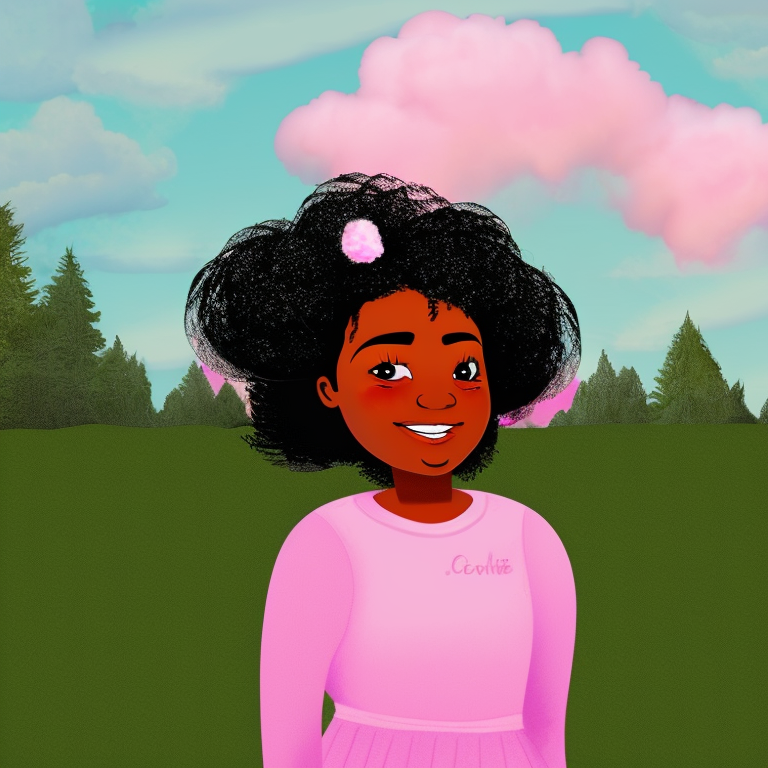

In [5]:
from torch import autocast

# Change prompt for image here!
prompt = "a cartoon black girl with cotton candy hair and a pink dress standing in front of a pink sky with cotton candy clouds"
with autocast(device):
  image = pipe(prompt, height=768, width=768).images[0]
image
